https://github.com/CDML-CEUB-GeorgeKurokiJr/projeto-1-regressao-linear-jmanacleto

[Dataset - Doenças cardiacas](https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction)

- Age: Age of the individual (years).

- Gender: Gender of the individual (Male/Female).

- Cholesterol: Cholesterol level in mg/dL.

- Blood Pressure: Systolic blood pressure in mmHg.

- Heart Rate: Heart rate in beats per minute.

- Smoking: Smoking status (Never/Former/Current). ('Never' = 0, 'Current' = 1, 'Former' = 2)

- Alcohol Intake: Alcohol intake frequency (Moderate/Heavy). (heavy = 1 e moderate = 0)

- Exercise Hours: Hours of exercise per week.

- Family History: Family history of heart disease (Yes/No).

- Diabetes: Diabetes status (Yes/No).(Yes = 1, No = 0)

- Obesity: Obesity status (Yes/No).(Yes = 1, No = 0)

- Stress Level: Stress level on a scale of 1 to 10.

- Blood Sugar: Fasting blood sugar level in mg/dL.

- Exercise Induced Angina: Presence of exercise-induced angina (Yes/No).(Yes = 1, No = 0)

- Chest Pain Type: Type of chest pain experienced (Typical Angina/Atypical Angina/Non-anginal Pain/Asymptomatic). ('Typical Angina': 0, 'Atypical Angina': 1, 'Non-anginal Pain': 2, 'Asymptomatic': 3)

- Heart Disease: Target variable indicating presence of heart disease (0: No, 1: Yes).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('C:/Users/João Miguel/Desktop/Code/Python Work/Data/heart_disease_dataset.csv')

In [3]:
df.shape

(1000, 16)

In [4]:
df.head(20)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,Male,309,110,73,Never,NaN,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
6,64,Female,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1
7,60,Female,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1
8,37,Female,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0
9,63,Male,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1


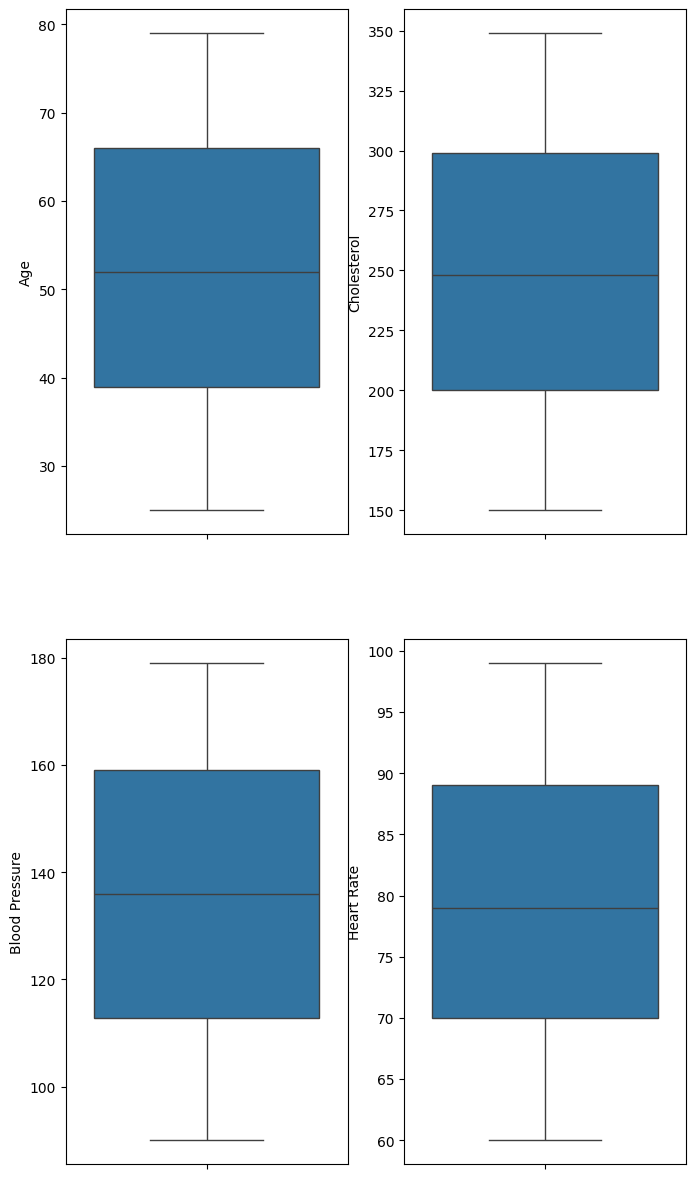

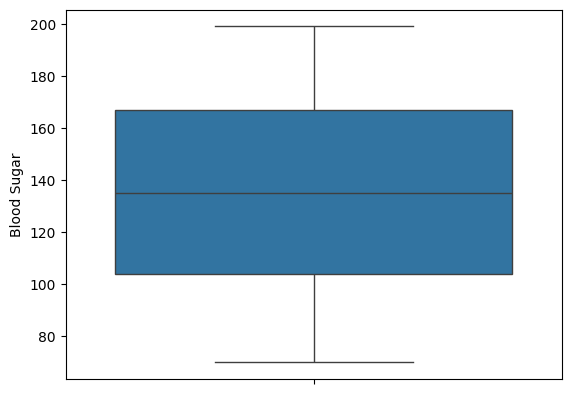

In [5]:
# Verificando outliers das colunas Age, Cholesterol, Blood Pressure e Heart Rate
plt.figure(figsize=(8,15))
plt.subplot(2,2,1)
sns.boxplot(df['Age'])
plt.subplot(2,2,2)
sns.boxplot(df['Cholesterol'])
plt.subplot(2,2,3)
sns.boxplot(df['Blood Pressure'])
plt.subplot(2,2,4)
sns.boxplot(df['Heart Rate'])
plt.show()
sns.boxplot(df['Blood Sugar'])
plt.show()


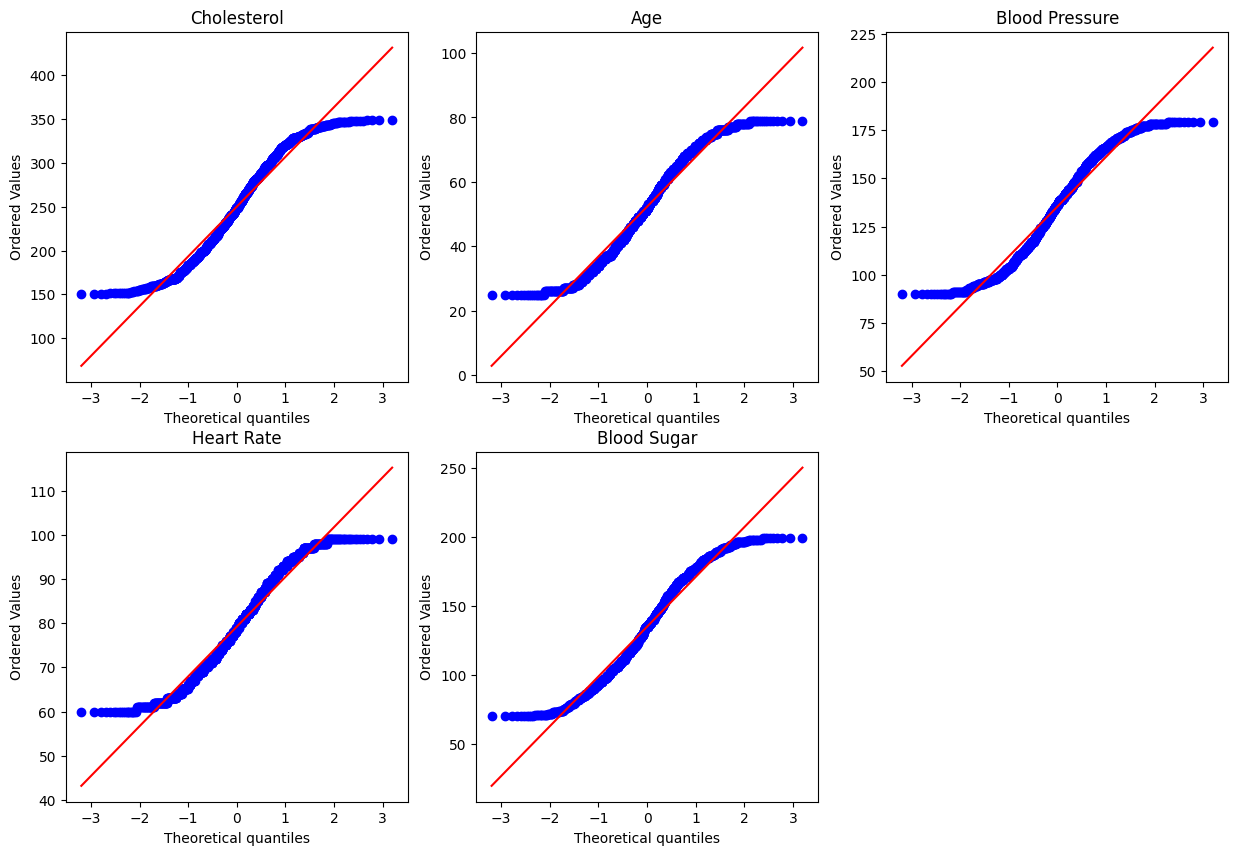

In [6]:
# prompt: faça um grafico de curva de normalpara a coluna Cholesterol  Age	Blood Pressure	Heart Rate    Blood Sugar

import matplotlib.pyplot as plt
import scipy.stats as stats
# Gráficos de curva normal para as colunas numéricas
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
stats.probplot(df['Cholesterol'], dist="norm", plot=plt)
plt.title('Cholesterol')
plt.subplot(2,3,2)
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Age')
plt.subplot(2,3,3)
stats.probplot(df['Blood Pressure'], dist="norm", plot=plt)
plt.title('Blood Pressure')
plt.subplot(2,3,4)
stats.probplot(df['Heart Rate'], dist="norm", plot=plt)
plt.title('Heart Rate')
plt.subplot(2,3,5)
stats.probplot(df['Blood Sugar'], dist="norm", plot=plt)
plt.title('Blood Sugar')
plt.show()


In [7]:
 # verificar (quantidade) de outliers nas colunas   Age   Cholesterol	Blood Pressure	Heart Rate Blood Sugar

def count_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers.shape[0]

print("Outliers in Age:", count_outliers(df, 'Age'))
print("Outliers in Cholesterol:", count_outliers(df, 'Cholesterol'))
print("Outliers in Blood Pressure:", count_outliers(df, 'Blood Pressure'))
print("Outliers in Heart Rate:", count_outliers(df, 'Heart Rate'))
print("Outliers in Blood Sugar:", count_outliers(df, 'Blood Sugar'))

Outliers in Age: 0
Outliers in Cholesterol: 0
Outliers in Blood Pressure: 0
Outliers in Heart Rate: 0
Outliers in Blood Sugar: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [9]:
# Verificar estatísticas descritivas
print(df.describe(include='all'))

                Age  Gender  Cholesterol  Blood Pressure   Heart Rate Smoking  \
count   1000.000000    1000  1000.000000       1000.0000  1000.000000    1000   
unique          NaN       2          NaN             NaN          NaN       3   
top             NaN  Female          NaN             NaN          NaN   Never   
freq            NaN     503          NaN             NaN          NaN     338   
mean      52.293000     NaN   249.939000        135.2810    79.204000     NaN   
std       15.727126     NaN    57.914673         26.3883    11.486092     NaN   
min       25.000000     NaN   150.000000         90.0000    60.000000     NaN   
25%       39.000000     NaN   200.000000        112.7500    70.000000     NaN   
50%       52.000000     NaN   248.000000        136.0000    79.000000     NaN   
75%       66.000000     NaN   299.000000        159.0000    89.000000     NaN   
max       79.000000     NaN   349.000000        179.0000    99.000000     NaN   

       Alcohol Intake  Exer

In [10]:
# Verificar valores ausentes
print(df.isnull().sum())

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64


Substituindo aleatóriamente os dados NaN da coluna **Alcohol Intake** por:

> 'None', 'Moderate', 'Heavy'



## Calculo de desvio padrão

In [11]:
# Calcular o desvio padrão para todas as colunas numéricas
desvio_padrao = df[['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate','Exercise Hours', 'Stress Level', 'Blood Sugar','Heart Disease']].std()

# Mostrar o desvio padrão de cada coluna
print(desvio_padrao)

Age               15.727126
Cholesterol       57.914673
Blood Pressure    26.388300
Heart Rate        11.486092
Exercise Hours     2.934241
Stress Level       2.831024
Blood Sugar       36.699624
Heart Disease      0.488441
dtype: float64


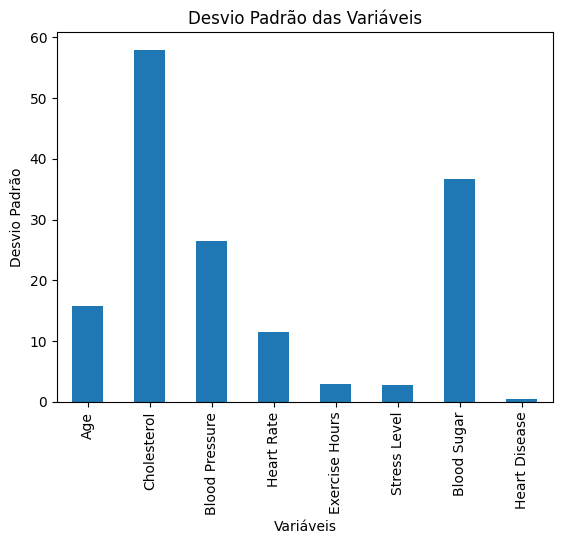

In [12]:
# Crie um gráfico de barras
desvio_padrao.plot(kind='bar')
plt.title('Desvio Padrão das Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Desvio Padrão')
plt.show()


In [13]:
# Selecionar as colunas numéricas para normalizar
#colunas_numericas = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate','Exercise Hours', 'Stress Level', 'Blood Sugar','Heart Disease']

# Criar um objeto StandardScaler
#scaler = StandardScaler()

# Ajustar e transformar os dados
#df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

# Mostrar os primeiros registros para verificar
#print(df.head())

## Predição para dados NaN

Solução 1: Tratar Colunas Categóricas e Numéricas Separadamente


In [14]:
# Tratar colunas numéricas: preencher valores ausentes com a média
colunas_numericas = ['Heart Rate', 'Blood Pressure']
df[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].mean())

# Tratar colunas categóricas: preencher valores ausentes com a moda (valor mais frequente)
colunas_categoricas = ['Smoking']
df[colunas_categoricas] = df[colunas_categoricas].fillna(df[colunas_categoricas].mode().iloc[0])

print(df.head())

   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   
2   53    Male          234              91          67    Never   
3   69  Female          192              90          72  Current   
4   62  Female          172             163          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1            NaN               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3            NaN               4             No      Yes      No   
4            NaN               6             No      Yes      No   

   Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  \
0             8          119                     Yes   Atypical Angina   
1             9           70      

In [15]:
df.head(20)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,Male,309,110,73,Never,NaN,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
6,64,Female,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1
7,60,Female,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1
8,37,Female,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0
9,63,Male,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1


In [16]:
# sumarizar linhas da coluna Alcohol Intake

df['Alcohol Intake'].value_counts()


Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64

 - heavy = 1 e moderate = 0
 - 'Never' = 0, 'Current' = 1, 'Former' = 2

In [17]:
# binarizar coluna alcohol intake. Transformar heavy = 1 e moderate = 0

df['Alcohol Intake'] = df['Alcohol Intake'].replace({'Heavy': 1, 'Moderate': 0})
df['Smoking'] = df['Smoking'].replace({'Never': 0, 'Current': 1, 'Former': 2})
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\1578423865.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Alcohol Intake'] = df['Alcohol Intake'].replace({'Heavy': 1, 'Moderate': 0})
C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\1578423865.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking'] = df['Smoking'].replace({'Never': 0, 'Current': 1, 'Former': 2})
C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\1578423865.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and w

In [18]:
# Passo 3: Selecionar as colunas desejadas
colunas_desejadas = ['Age', 'Gender', 'Cholesterol',	'Blood Pressure', 'Heart Rate',	'Smoking',	'Alcohol Intake']

# Passo 4: Criar um novo DataFrame com essas colunas
df_ml = pd.DataFrame(df[colunas_desejadas])

# Exibir o novo DataFrame
print(df_ml)

     Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0     75       0          228             119          66        1   
1     48       1          204             165          62        1   
2     53       1          234              91          67        0   
3     69       0          192              90          72        1   
4     62       0          172             163          93        0   
..   ...     ...          ...             ...         ...      ...   
995   56       0          269             111          86        0   
996   78       0          334             145          76        0   
997   79       1          151             179          81        0   
998   60       0          326             151          68        2   
999   53       1          226             116          82        1   

     Alcohol Intake  
0               1.0  
1               NaN  
2               1.0  
3               NaN  
4               NaN  
..              ...  
995  

In [19]:
df_ml.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake
0,75,0,228,119,66,1,1.0
1,48,1,204,165,62,1,NaN
2,53,1,234,91,67,0,1.0
3,69,0,192,90,72,1,NaN
4,62,0,172,163,93,0,NaN


In [20]:
# 8. Resultado final
print(df_ml)

     Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0     75       0          228             119          66        1   
1     48       1          204             165          62        1   
2     53       1          234              91          67        0   
3     69       0          192              90          72        1   
4     62       0          172             163          93        0   
..   ...     ...          ...             ...         ...      ...   
995   56       0          269             111          86        0   
996   78       0          334             145          76        0   
997   79       1          151             179          81        0   
998   60       0          326             151          68        2   
999   53       1          226             116          82        1   

     Alcohol Intake  
0               1.0  
1               NaN  
2               1.0  
3               NaN  
4               NaN  
..              ...  
995  

In [21]:
# 2. Separar dados sem valores NaN em 'Alcohol Intake' (dados para treino)
train_data = df_ml.dropna(subset=['Alcohol Intake'])

# Separar dados com valores NaN em 'Alcohol Intake' (dados para previsão)
predict_data = df_ml[df_ml['Alcohol Intake'].isna()]

# 3. Codificação das variáveis categóricas
le_smoking = LabelEncoder()
train_data['Blood Pressure'] = le_smoking.fit_transform(train_data['Blood Pressure'])
predict_data['Blood Pressure'] = le_smoking.transform(predict_data['Blood Pressure'])

le_alcohol = LabelEncoder()
train_data['Alcohol Intake'] = le_alcohol.fit_transform(train_data['Alcohol Intake'])

# 4. Separar variáveis preditoras e alvo
X = train_data[['Age', 'Gender', 'Cholesterol',	'Blood Pressure', 'Heart Rate',	'Smoking']]
y = train_data['Alcohol Intake']

# 5. Normalizar os dados contínuos
scaler = StandardScaler()
X[['Cholesterol', 'Blood Pressure', 'Heart Rate']] = scaler.fit_transform(X[['Cholesterol', 'Blood Pressure', 'Heart Rate']])
predict_data[['Cholesterol', 'Blood Pressure', 'Heart Rate']] = scaler.transform(predict_data[['Cholesterol', 'Blood Pressure', 'Heart Rate']])

# 6. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 7. Treinar o modelo de regressão logística
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# 8. Avaliar o modelo no conjunto de teste
y_test_pred = log_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste com Regressão Logística: {test_accuracy:.2f}')

# 9. Avaliação com validação cruzada
cv_scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
print(f'Acurácia média com cross-validation: {cv_scores.mean():.2f}')

# 10. Prever valores ausentes
X_predict = predict_data[['Age', 'Gender', 'Cholesterol',	'Blood Pressure', 'Heart Rate',	'Smoking']]
y_predict = log_model.predict(X_predict)

# 11. Substituir valores NaN com as previsões
df_ml.loc[df_ml['Alcohol Intake'].isna(), 'Alcohol Intake'] = le_alcohol.inverse_transform(y_predict)

# 12. Resultado final
print(df_ml)

C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\2022704003.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Blood Pressure'] = le_smoking.fit_transform(train_data['Blood Pressure'])
C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\2022704003.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['Blood Pressure'] = le_smoking.transform(predict_data['Blood Pressure'])
C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\2022704003.py:13: SettingWithCopyWarning: 
A val

Acurácia no conjunto de teste com Regressão Logística: 0.55
Acurácia média com cross-validation: 0.51
     Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0     75       0          228             119          66        1   
1     48       1          204             165          62        1   
2     53       1          234              91          67        0   
3     69       0          192              90          72        1   
4     62       0          172             163          93        0   
..   ...     ...          ...             ...         ...      ...   
995   56       0          269             111          86        0   
996   78       0          334             145          76        0   
997   79       1          151             179          81        0   
998   60       0          326             151          68        2   
999   53       1          226             116          82        1   

     Alcohol Intake  
0               1.0  
1            

In [22]:
print(f'Acurácia no conjunto de treinamento: {test_accuracy:.2f}')

Acurácia no conjunto de treinamento: 0.55


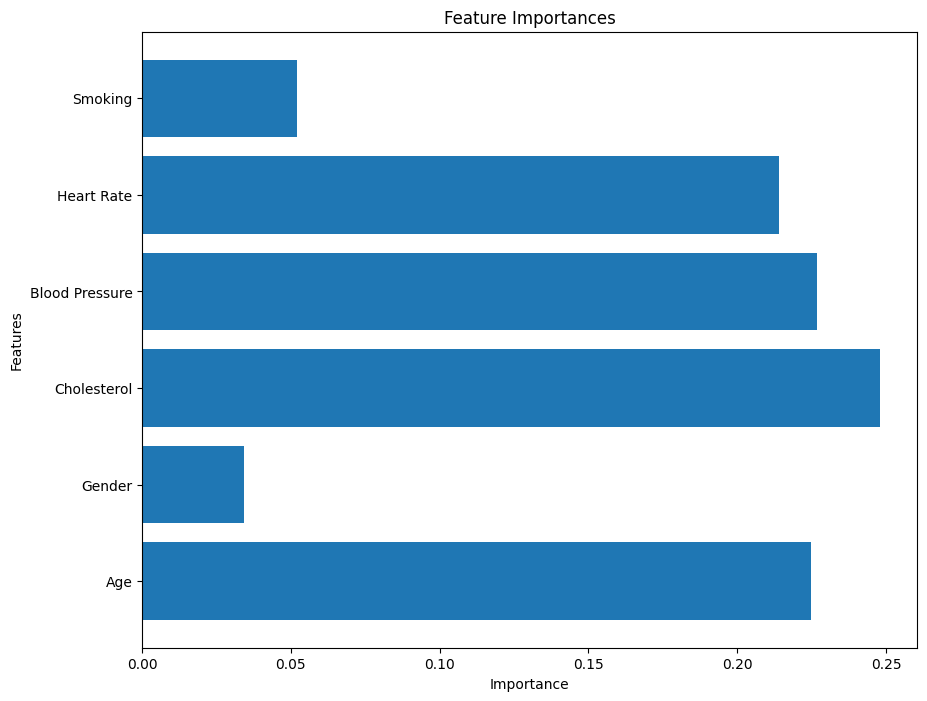

In [23]:
# Assuming you've already trained your model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Now you can access feature importances
importance = best_model.feature_importances_
features = X.columns

# Create a bar plot of feature importances

plt.figure(figsize=(10, 8))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [24]:
df_ml.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake
0,75,0,228,119,66,1,1.0
1,48,1,204,165,62,1,1.0
2,53,1,234,91,67,0,1.0
3,69,0,192,90,72,1,0.0
4,62,0,172,163,93,0,1.0


In [25]:
# Substituir as colunas do DataFrame original df pelas colunas do df_ml
df[['Cholesterol', 'Blood Pressure', 'Heart Rate', 'Smoking', 'Alcohol Intake']] = df_ml[['Cholesterol', 'Blood Pressure', 'Heart Rate', 'Smoking', 'Alcohol Intake']]

In [26]:
df.isna().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [27]:
df.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,0,228,119,66,1,1.0,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,1,204,165,62,1,1.0,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,1,234,91,67,0,1.0,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,0,192,90,72,1,0.0,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,0,172,163,93,0,1.0,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [28]:
#Sumarização de pessoas

import pandas as pd
import numpy as np

# Definir as faixas etárias
bins = [0, 30, 40, 50, 60, 70, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']

# Criar uma nova coluna com as faixas etárias
df['faixa_etaria'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Sumarizar as idades por faixa etária
idade_por_faixa = df['faixa_etaria'].value_counts()

# Exibir o resultado
faixa_etaria = pd.DataFrame(idade_por_faixa)
faixa_etaria

,count
faixa_etaria,
40-49,195
60-69,192
50-59,177
30-39,171
70+,161
<30,104


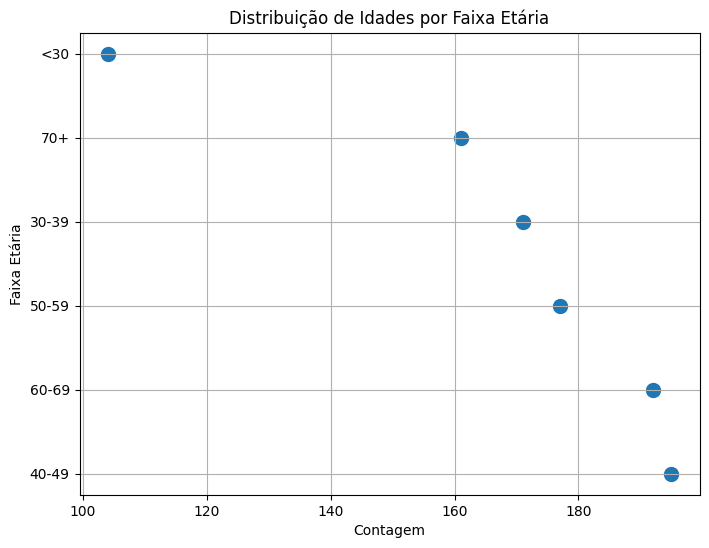

In [29]:
import matplotlib.pyplot as plt
# Extraia os valores de contagem e rótulos de faixa etária
contagem = faixa_etaria.values # Access the count values directly
rotulos = faixa_etaria.index

# Crie o gráfico de pontos
plt.figure(figsize=(8, 6))
plt.scatter(contagem, rotulos, s=100)  # Ajuste o tamanho dos pontos com 's'

plt.xlabel('Contagem')
plt.ylabel('Faixa Etária')
plt.title('Distribuição de Idades por Faixa Etária')
plt.grid(True)
plt.show()

- heavy = 1 e moderate = 0

In [30]:
## Quantas pessoas de todas as faixas etarias de idade consomem alcool dividido em heavy = 1 e moderate = 0

# Agrupar por faixa etária e consumo de álcool e contar as ocorrências
pessoas_por_faixa_e_alcool = df.groupby(['faixa_etaria', 'Alcohol Intake'])['Age'].count()

# Exibir o resultado
pessoas_por_faixa_e_alcool = pd.DataFrame(pessoas_por_faixa_e_alcool)
pessoas_por_faixa_e_alcool


C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\2130581282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pessoas_por_faixa_e_alcool = df.groupby(['faixa_etaria', 'Alcohol Intake'])['Age'].count()


Age
faixa_etaria Alcohol Intake     
<30          0.0              29
             1.0              75
30-39        0.0              48
             1.0             123
40-49        0.0              58
             1.0             137
50-59        0.0              68
             1.0             109
60-69        0.0             104
             1.0              88
70+          0.0             116
             1.0              45

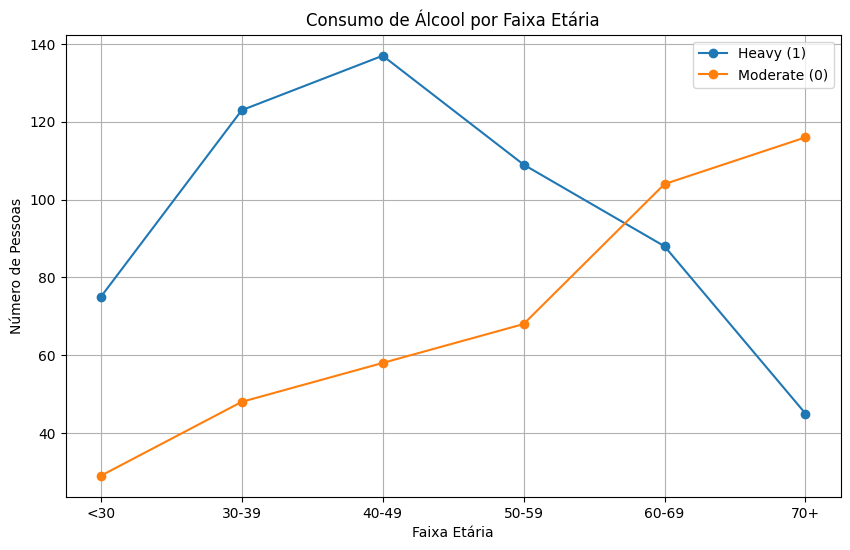

In [31]:
# Grafico de duas linhas para 1 e 0 e faixa etaria de acordo com o resultado do código anterior

import matplotlib.pyplot as plt
# Extrair dados para consumo de álcool 1 e 0
alcool_1 = pessoas_por_faixa_e_alcool.loc[(slice(None), 1), 'Age'].values
alcool_0 = pessoas_por_faixa_e_alcool.loc[(slice(None), 0), 'Age'].values
faixas_etarias = pessoas_por_faixa_e_alcool.index.get_level_values(0).unique()

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(faixas_etarias, alcool_1, label='Heavy (1)', marker='o')
plt.plot(faixas_etarias, alcool_0, label='Moderate (0)', marker='o')

plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.title('Consumo de Álcool por Faixa Etária')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
# Filtrar o DataFrame para pessoas entre 40 e 49 anos que consomem álcool
pessoas_30_39_alcool = df[(df['faixa_etaria'] == '30-39') & (df['Alcohol Intake'] == 1)]
pessoas_40_49_alcool = df[(df['faixa_etaria'] == '40-49') & (df['Alcohol Intake'] == 1)]
pessoas_50_59_alcool = df[(df['faixa_etaria'] == '50-59') & (df['Alcohol Intake'] == 1)]
pessoas_60_69_alcool = df[(df['faixa_etaria'] == '60-69') & (df['Alcohol Intake'] == 1)]
pessoas_70_mais_alcool = df[(df['faixa_etaria'] == '70+') & (df['Alcohol Intake'] == 1)]

# Contar o número de pessoas
quantidade_pessoas_30_39 = pessoas_30_39_alcool.shape[0]
quantidade_pessoas_40_49 = pessoas_40_49_alcool.shape[0]
quantidade_pessoas_50_59 = pessoas_50_59_alcool.shape[0]
quantidade_pessoas_60_69 = pessoas_60_69_alcool.shape[0]
quantidade_pessoas_70_mais = pessoas_70_mais_alcool.shape[0]

# Criar um dicionário com as informações
data = {
    'Faixa Etária': ['30-39', '40-49', '50-59', '60-69', '70+'],
    'Total - Álcool': [ quantidade_pessoas_30_39, quantidade_pessoas_40_49, quantidade_pessoas_50_59, quantidade_pessoas_60_69, quantidade_pessoas_70_mais]
}

# Criar o DataFrame
df_age_range = pd.DataFrame(data)

# Exibir o DataFrame
df_age_range


,Faixa Etária,Total - Álcool
0,30-39,123
1,40-49,137
2,50-59,109
3,60-69,88
4,70+,45


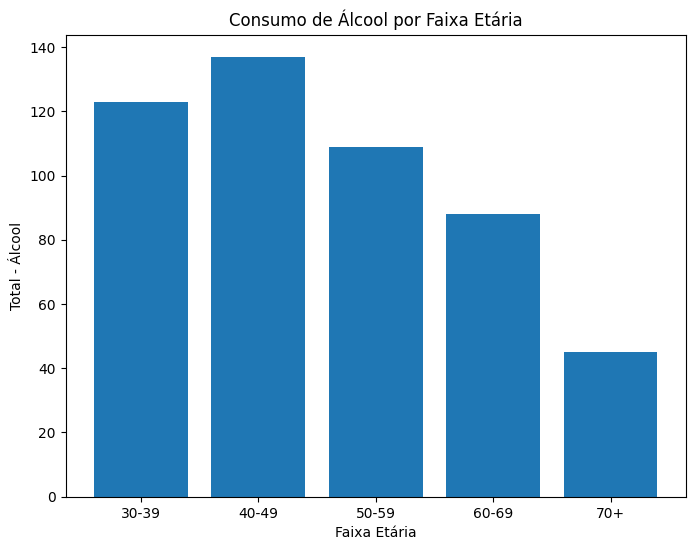

In [33]:
import matplotlib.pyplot as plt

# Extract the age range and total alcohol count
faixa_etaria = df_age_range['Faixa Etária']
total_alcool = df_age_range['Total - Álcool']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(faixa_etaria, total_alcool)

plt.xlabel('Faixa Etária')
plt.ylabel('Total - Álcool')
plt.title('Consumo de Álcool por Faixa Etária')

plt.show()

In [34]:
df['Alcohol Intake'] = df['Alcohol Intake'].astype(int)

In [35]:
chest_pain_summary = df['Chest Pain Type'].value_counts()
print(chest_pain_summary)

Chest Pain Type
Non-anginal Pain    256
Typical Angina      250
Asymptomatic        248
Atypical Angina     246
Name: count, dtype: int64


In [36]:
df['Family History'] = df['Family History'].replace({'Yes': 1, 'No': 0})
df['Diabetes'] = df['Diabetes'].replace({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].replace({'Yes': 1, 'No': 0})
df['Exercise Induced Angina'] = df['Exercise Induced Angina'].replace({'Yes': 1, 'No': 0})
df['Chest Pain Type'] = df['Chest Pain Type'].replace({'Typical Angina': 0, 'Atypical Angina': 1, 'Non-anginal Pain': 2, 'Asymptomatic': 3})

C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\2462512127.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History'] = df['Family History'].replace({'Yes': 1, 'No': 0})
C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\2462512127.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diabetes'] = df['Diabetes'].replace({'Yes': 1, 'No': 0})
C:\Users\João Miguel\AppData\Local\Temp\ipykernel_4464\2462512127.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future

In [37]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,faixa_etaria
0,75,0,228,119,66,1,1,1,0,0,1,8,119,1,1,1,70+
1,48,1,204,165,62,1,1,5,0,0,0,9,70,1,0,0,40-49
2,53,1,234,91,67,0,1,3,1,0,1,5,196,1,1,1,50-59
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,2,0,60-69
4,62,0,172,163,93,0,1,6,0,1,0,2,183,1,3,0,60-69


## Ruido gaussiano (Teste)

In [38]:
# Copia o DataFrame original para preservar os dados originais
df_noisy = df.copy()

# Parâmetros do ruído
mean = 0  # média do ruído
std_dev = 1  # desvio padrão do ruído

for col in ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']:
    noise = np.random.normal(mean, std_dev, df_noisy[col].shape)
    df_noisy[col] = df_noisy[col] + noise

print("Original DataFrame:")
print(df.head())
print("\nDataFrame com Ruído Gaussiano:")
print(df_noisy.head())

Original DataFrame:
   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75       0          228             119          66        1   
1   48       1          204             165          62        1   
2   53       1          234              91          67        0   
3   69       0          192              90          72        1   
4   62       0          172             163          93        0   

   Alcohol Intake  Exercise Hours  Family History  Diabetes  Obesity  \
0               1               1               0         0        1   
1               1               5               0         0        0   
2               1               3               1         0        1   
3               0               4               0         1        0   
4               1               6               0         1        0   

   Stress Level  Blood Sugar  Exercise Induced Angina  Chest Pain Type  \
0             8          119                        1           

In [39]:
df_noisy.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease,faixa_etaria
0,76.553269,0,227.705654,119.528925,66.311299,1,1,0.794777,0,0,1,7.835234,119.090136,1,1,1,70+
1,49.190792,1,204.688572,165.312415,63.278382,1,1,4.349668,0,0,0,9.287248,68.805922,1,0,0,40-49
2,51.249023,1,233.974323,88.778962,66.508583,0,1,1.959095,1,0,1,3.467201,196.516016,1,1,1,50-59
3,67.640866,0,191.732021,90.090453,71.845618,1,0,3.279996,0,1,0,7.252111,107.357706,1,2,0,60-69
4,63.610919,0,173.307325,162.565500,93.374146,0,1,6.275958,0,1,0,0.205722,182.804479,1,3,0,60-69


## Mixup (Teste)

In [40]:
# Suponha que 'Heart Disease' como rótulo
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

def mixup(X, y, alpha=0.2):
    # Seleciona apenas colunas numéricas
    X_numeric = X.select_dtypes(include=[np.number])

    # Número de exemplos
    n_samples = len(X_numeric)
    
    # Shuffle nos índices
    indices = np.random.permutation(n_samples)
    
    # Escolha de um valor de lambda a partir da distribuição beta
    lam = np.random.beta(alpha, alpha)
    
    # Criação dos novos exemplos de dados
    X_mix = lam * X_numeric.values + (1 - lam) * X_numeric.values[indices]
    y_mix = lam * y.values + (1 - lam) * y.values[indices]
    
    # Convertendo de volta para DataFrame
    X_mix_df = pd.DataFrame(X_mix, columns=X_numeric.columns)

    # Reinserindo colunas não numéricas
    X_non_numeric = X.select_dtypes(exclude=[np.number])
    X_mix_df = pd.concat([X_mix_df.reset_index(drop=True), X_non_numeric.reset_index(drop=True)], axis=1)
    
    return X_mix_df, pd.Series(y_mix)

# Aplicando o Mixup
X_mix, y_mix = mixup(X, y)

# Mostrando os novos dados gerados
print(X_mix.head())
print(y_mix.head())

         Age  Gender  Cholesterol  Blood Pressure  Heart Rate   Smoking  \
0  65.917421     0.0   238.091754      115.467886   78.110105  0.495412   
1  62.633044     1.0   226.201859      150.366956   68.055053  1.000000   
2  63.596342     1.0   210.284378      110.174333   80.623868  0.504588   
3  47.302728     0.0   256.587227       99.587166   77.045877  0.495412   
4  44.339430     0.0   219.431245      167.036702   94.513763  0.000000   

   Alcohol Intake  Exercise Hours  Family History  Diabetes   Obesity  \
0        0.495412        1.000000        0.000000  0.504588  0.495412   
1        0.495412        7.018351        0.504588  0.504588  0.000000   
2        0.495412        3.504588        0.495412  0.000000  1.000000   
3        0.504588        2.990825        0.504588  1.000000  0.000000   
4        1.000000        3.981649        0.504588  0.495412  0.000000   

   Stress Level  Blood Sugar  Exercise Induced Angina  Chest Pain Type  \
0      4.972474   104.366956        

In [41]:
X_mix.head(30)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,faixa_etaria
0,65.917421,0.000000,238.091754,115.467886,78.110105,0.495412,0.495412,1.000000,0.000000,0.504588,0.495412,4.972474,104.366956,0.495412,1.000000,70+
1,62.633044,1.000000,226.201859,150.366956,68.055053,1.000000,0.495412,7.018351,0.504588,0.504588,0.000000,6.477061,98.256912,1.000000,0.504588,40-49
2,63.596342,1.000000,210.284378,110.174333,80.623868,0.504588,0.495412,3.504588,0.495412,0.000000,1.000000,2.981649,196.000000,0.495412,0.495412,50-59
3,47.302728,0.000000,256.587227,99.587166,77.045877,0.495412,0.504588,2.990825,0.504588,1.000000,0.000000,7.504588,130.715622,0.495412,2.000000,60-69
4,44.339430,0.000000,219.431245,167.036702,94.513763,0.000000,1.000000,3.981649,0.504588,0.495412,0.000000,5.532114,180.981649,0.495412,2.495412,60-69
5,55.807316,1.000000,318.587166,129.174333,76.027526,1.009175,0.000000,1.009175,0.504588,0.495412,1.000000,6.018351,125.027526,1.000000,1.990825,70+
6,66.018351,0.504588,204.440360,107.522939,86.000000,2.000000,0.495412,6.990825,1.000000,1.000000,0.495412,5.532114,139.174333,0.000000,1.513763,60-69
7,42.339430,0.504588,238.275263,151.532114,73.412834,0.504588,0.504588,6.522939,0.000000,1.000000,1.000000,4.018351,100.889895,1.000000,3.000000,50-59
8,34.477061,0.000000,314.981649,145.577991,68.018351,1.504588,0.495412,4.009175,0.000000,1.000000,1.000000,5.504588,145.284438,0.504588,2.504588,30-39
9,46.853193,0.495412,235.789026,149.073403,71.532114,2.000000,1.000000,8.504588,0.504588,1.000000,0.000000,3.000000,90.348606,0.504588,2.495412,60-69


In [42]:
X_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1000 non-null   float64 
 1   Gender                   1000 non-null   float64 
 2   Cholesterol              1000 non-null   float64 
 3   Blood Pressure           1000 non-null   float64 
 4   Heart Rate               1000 non-null   float64 
 5   Smoking                  1000 non-null   float64 
 6   Alcohol Intake           1000 non-null   float64 
 7   Exercise Hours           1000 non-null   float64 
 8   Family History           1000 non-null   float64 
 9   Diabetes                 1000 non-null   float64 
 10  Obesity                  1000 non-null   float64 
 11  Stress Level             1000 non-null   float64 
 12  Blood Sugar              1000 non-null   float64 
 13  Exercise Induced Angina  1000 non-null   float64 
 14  Chest Pai

## Modelo de DL

In [43]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Usando o DataFrame com ruído
df = df_noisy

# Separar as features e a variável alvo
X = df.drop(columns=['Heart Disease', 'faixa_etaria'])
y = df['Heart Disease']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construção do modelo de DL
model = Sequential()

# Camada de entrada e uma camada oculta
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # 64 neurônios na primeira camada oculta
model.add(Dense(32, activation='relu'))  # 32 neurônios na segunda camada oculta

# Camada de saída para prever Heart Disease (0 ou 1)
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)


c:\Users\João Miguel\Desktop\Code\Python Work\venv_work\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4056 - loss: 0.7729 - val_accuracy: 0.6200 - val_loss: 0.6484
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7187 - loss: 0.6016 - val_accuracy: 0.7100 - val_loss: 0.5481
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8049 - loss: 0.5018 - val_accuracy: 0.8050 - val_loss: 0.4504
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8486 - loss: 0.4082 - val_accuracy: 0.8300 - val_loss: 0.3777
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8572 - loss: 0.3386 - val_accuracy: 0.8500 - val_loss: 0.3311
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8550 - loss: 0.3069 - val_accuracy: 0.8600 - val_loss: 0.3037
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8670 - loss: 0.2828 - val_accuracy: 0.8600 - val_loss: 0.2849
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8902 - loss: 0.2457 - val_accuracy: 0.8600 - val_loss

In [46]:
print(f'Loss: {loss}, Accuracy: {accuracy}')

Loss: 0.11711046099662781, Accuracy: 0.949999988079071
